In [633]:
import os
import io
import numpy as np
import sklearn
import sklearn.model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import pandas as pd
import collections
import matplotlib.pyplot as plt
import pydotplus
#import graphviz as g

#Model taken from https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/


In [634]:
## Import and prepare data

df=pd.read_csv('data_full.csv')

#print(df) #Uncomment to see imported data

In [635]:
# Divide data into testing and training sets
X = df.drop(['tm'], axis=1)
Y = df['tm']
xTrain, xTest, yTrain, yTest, = sk.model_selection.train_test_split(X, Y, test_size = 1/5, random_state = 0)


In [641]:
## Features taken from Ruben's NN model + baseline + others

# Add features to training data
for index, row in xTrain.iterrows():
    sequence = row[1]
    counts = collections.Counter(sequence)
    # Length feature
    xTrain.at[index, 'Length'] = len(sequence)
    
    # add (E + K)/(Q + H) ratio feature
    
    if (counts['Q'] + counts['H']) != 0:
        xTrain.at[index, '(E + K)/(Q + H)'] = (counts['E'] + counts['K']) /(counts['Q'] + counts['H'])
    else:
        xTrain.at[index, '(E + K)/(Q + H)'] = 0  
    
    for key in counts.keys():
        continue
        xTrain.at[index, "num " + key] = counts[key]
        xTrain.at[index, "presence " + key] = 1
        
xTrain = xTrain.fillna(0)

#Make a list of all features
featureNames = []
featureValues = {}
for feature in xTrain.columns.tolist()[2:]:
    featureNames.append(feature)
for feature in featureNames:
    featureValues[feature] = xTrain[feature]
    
#print(featureNames)

#print(featureValues['Length'].tolist()) #Uncomment to see features and values for training data

In [642]:
# Extract features from sequence
def extractSeqFeatures(sequence, features):
    sequenceDF = pd.DataFrame()
    counts = collections.Counter(sequence)
    # Length feature
    sequenceDF.at[index, 'Length'] = len(sequence)
    
    # add (E + K)/(Q + H) ratio feature
    if (counts['Q'] + counts['H']) != 0:
        sequenceDF.at[index, '(E + K)/(Q + H)'] = (counts['E'] + counts['K']) /(counts['Q'] + counts['H'])
    else:
        sequenceDF.at[index, '(E + K)/(Q + H)'] = 0  
        
    for key in counts.keys():
        if "num " + key in featureNames:
            sequenceDF.at[index, "num " + key] = counts[key]
        if "presence " + key in featureNames:
            sequenceDF.at[index, "presence " + key] = 1
    
    # Fill out features not found
    for name in featureNames:
        if name not in sequenceDF.columns.values:
            sequenceDF.at[index, name] = 0.0
            
    sequenceDF = sequenceDF.fillna(0)
    return sequenceDF    

In [643]:
from sklearn.tree import DecisionTreeRegressor

# Create tree
rTree = DecisionTreeRegressor(criterion='mse')

# Make list of training features data
#print(xTrain)
XTrainFeatures = []
for row in xTrain.iterrows():
    index, data = row
    XTrainFeatures.append(data.tolist()[2:]) # Starting from 2 so that name and sequence not in list

#print(XTrainFeatures)
#print(YTrainTargets)
YTrainTargets = yTrain.tolist()

# Fit tree according to features
rTree = rTree.fit(XTrainFeatures, YTrainTargets)

#print(XTrainFeatures)
prediction = rTree.predict([XTrainFeatures[8]])

# Update testing dataset
XTestFeatures = []
#print(xTest)
for row in xTest.iterrows():
    index, data = row
    sequence = data[1]
    featuresDF = extractSeqFeatures(sequence, featureNames)
    XTestFeatures.append(featuresDF.values.tolist())

y_Pred = []
for data in XTestFeatures:
    prediction_Tm = rTree.predict(data)
    y_Pred.append(prediction_Tm[0])

#print(y_Pred)

yTestList =[int(i) for i in yTest.tolist()]
yPredList = [int(i) for i in y_Pred]
print(yTestList)
print(yPredList)
print("Accuracy is: ", accuracy_score(yTestList, yPredList))

[336, 360, 331, 327, 360, 363, 343, 343, 338, 330, 368, 340, 335, 346, 377, 349, 361, 359, 331, 338, 338, 326, 330, 363, 341, 360, 342, 317, 334, 336, 326, 341, 316, 322, 319, 325, 351, 346, 339, 360, 331, 357, 327, 363, 330, 345, 338, 321, 338]
[342, 333, 340, 337, 329, 327, 330, 326, 337, 328, 347, 343, 326, 346, 327, 339, 333, 362, 320, 364, 298, 356, 361, 337, 298, 323, 337, 346, 324, 298, 315, 337, 334, 366, 361, 324, 361, 317, 339, 377, 325, 334, 334, 363, 339, 348, 325, 315, 298]
Accuracy is:  0.061224489795918366


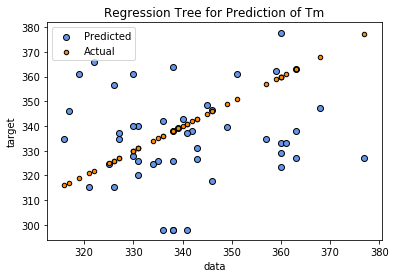

In [644]:
import random
# Plot the results
plt.figure()
#print(df['protein'].tolist())
plt.scatter(yTestList, y_Pred, edgecolor="black",
            c="cornflowerblue", label="Predicted")
plt.scatter(yTestList, yTestList, s=20, edgecolor="black",
            c="darkorange", label="Actual")

#print(XTrainFeatures)
#print(y_Pred)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Regression Tree for Prediction of Tm")
plt.legend()
plt.show()